In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


# New Section

# New Section

In [2]:
import yfinance as yf
df = yf.download('^GSPC', auto_adjust=True)
df['reversal %'] = (df['Close'] / df['Low'] - 1) *100
df.sort_values('reversal %', ascending=False).head(10).iloc[:,-1].reset_index()

[*********************100%***********************]  1 of 1 completed


,Date,reversal %
0,2008-11-13 00:00:00-05:00,11.310750
1,2008-10-28 00:00:00-04:00,11.267404
2,2008-10-13 00:00:00-04:00,9.926045
3,1987-10-20 00:00:00-04:00,9.410512
4,1962-05-29 00:00:00-04:00,9.316771
5,2008-10-16 00:00:00-04:00,9.308984
6,1987-10-21 00:00:00-04:00,9.099355
7,2020-03-13 00:00:00-04:00,8.772770
8,2002-07-24 00:00:00-04:00,8.734272
9,2008-11-21 00:00:00-05:00,7.963349


In [3]:
df['reversal rank'] = df['reversal %'].rank(ascending=False)
df.tail()

,Open,High,Low,Close,Volume,reversal %,reversal rank
Date,,,,,,,
2023-09-11 00:00:00-04:00,4480.979980,4490.770020,4467.890137,4487.459961,3369920000,0.438010,9945.0
2023-09-12 00:00:00-04:00,4473.270020,4487.109863,4456.830078,4461.899902,3435740000,0.113754,14008.0
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,0.312560,11696.0
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,0.589685,7863.0
2023-09-15 00:00:00-04:00,4497.979980,4497.979980,4447.209961,4450.319824,6932230000,0.069928,14488.0


In [4]:
len(df)

24042

count    100.000000
mean      -0.268740
std        3.004598
min      -11.984055
25%       -1.829199
50%       -0.417292
75%        1.043080
max       11.580037
Name: next_day_ret, dtype: float64


<AxesSubplot: >

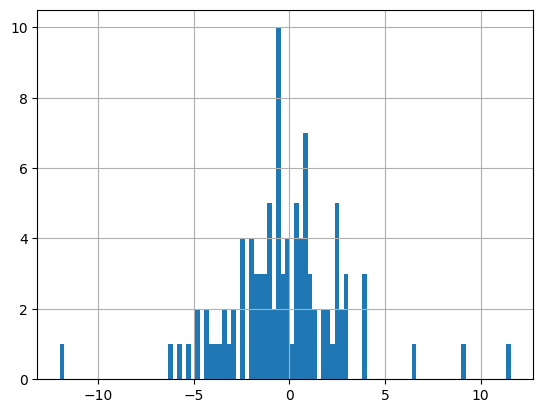

In [5]:
df['next_day_ret'] = (df.Close.shift(-1) / df.Close -1)*100

print(df.sort_values('reversal rank').iloc[:100,-1].describe())
df.sort_values('reversal rank').iloc[:100,-1].hist(bins=100)